In [1]:
import gzip
from tqdm import tqdm, trange
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import BallTree
import pickle
from geopy.geocoders import Nominatim
import reverse_geocode as rg
import geopy.distance

In [2]:
places_file = "places.clean.json.gz"
users_file = "users.clean.json.gz"
reviews_file = "reviews.clean.json.gz"

In [3]:
def parse(path):
    for l in gzip.open(path, 'rt'):
        yield eval(l)
#     g = gzip.open(path, 'r')
#     for l in g:
#         yield eval(l)

In [4]:
places_data = []

In [5]:
users_data = []

In [6]:
reviews_data = []

In [7]:
for l in tqdm(parse(places_file)):
    places_data.append(l)

3114353it [03:29, 14864.93it/s]


In [8]:
for l in tqdm(parse(users_file)):
    users_data.append(l)

3747937it [12:59, 4810.55it/s] 


In [9]:
# for l in tqdm(parse(reviews_file)):
#     reviews_data.append(l)

In [9]:
places_data[0]

{'name': 'Diamond Valley Lake Marina',
 'price': None,
 'address': ['2615 Angler Ave', 'Hemet, CA 92545'],
 'hours': [['Monday', [['6:30 am--4:15 pm']]],
  ['Tuesday', [['6:30 am--4:15 pm']]],
  ['Wednesday', [['6:30 am--4:15 pm']], 1],
  ['Thursday', [['6:30 am--4:15 pm']]],
  ['Friday', [['6:30 am--4:15 pm']]],
  ['Saturday', [['6:30 am--4:15 pm']]],
  ['Sunday', [['6:30 am--4:15 pm']]]],
 'phone': '(951) 926-7201',
 'closed': False,
 'gPlusPlaceId': '104699454385822125632',
 'gps': [33.703804, -117.003209]}

In [10]:
users_data[32]

{'userName': 'Thomas Weingart',
 'jobs': None,
 'currentPlace': ['Winterbach', [[], 487988280, 94809220, 1]],
 'previousPlaces': None,
 'education': [[[], [], [], [], [], 6], []],
 'gPlusUserId': '100000142643769001873'}

In [11]:
# reviews_data[100:200]

In [12]:
from geopy.geocoders import Nominatim
import reverse_geocode as rg

In [13]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [14]:
countries_dict = {}
for i in tqdm(range(len(users_data))):
    if users_data[i]['currentPlace'] is not None:
        if len(users_data[i]['currentPlace'])>1:
            latitude = users_data[i]['currentPlace'][1][1]/10**7
            longitude = users_data[i]['currentPlace'][1][2]/10**7
#             location = geolocator.reverse(latitude+","+longitude)
            coord = (latitude , longitude)
#             print(coord)
            pos = rg.search([coord])
            country = pos[0]['country']
#             address = location.raw['address']
            if country not in countries_dict:
                countries_dict[country] = 1
            else:
                countries_dict[country] += 1
#             print(users_data[i]['currentPlace'][1])
#     if count > 100:
#         break
# print(count)

100%|█████████████████████████████| 3747937/3747937 [00:31<00:00, 117713.08it/s]


In [15]:
len(countries_dict)

243

In [16]:
# for i in range(len(users_data)):
#     print(users_data[i]['jobs'])

In [17]:
users_data[1]

{'userName': 'HALİL TURGUT',
 'jobs': [['Mustafa Nevzat İlaç San. A.Ş.', 'Rebrezant', [], '', '']],
 'currentPlace': ['Adana', [[], 370000000, 353213330, 1]],
 'previousPlaces': None,
 'education': [[[], [], [], [], [], 6],
  [['Anadolu University',
    '',
    [[], [1, 1, 2001]],
    'http://www.freebase.com/view/m/064f68',
    '']]],
 'gPlusUserId': '100000013500285534661'}

In [18]:
countries_count = []
for country in countries_dict:
    countries_count.append((countries_dict[country], country))

In [19]:
countries_count.sort(reverse = True)

In [20]:
countries_count

[(340400, 'United States'),
 (52230, 'India'),
 (30856, 'United Kingdom'),
 (24440, 'Canada'),
 (22614, 'Brazil'),
 (19116, 'Germany'),
 (17503, 'Spain'),
 (14919, 'Italy'),
 (14276, 'France'),
 (11512, 'Australia'),
 (10689, 'Russian Federation'),
 (8497, 'Mexico'),
 (8303, 'Taiwan'),
 (7990, 'Indonesia'),
 (7065, 'Poland'),
 (5987, 'Argentina'),
 (5575, 'Japan'),
 (5414, 'Netherlands'),
 (5284, 'Ukraine'),
 (5225, 'Colombia'),
 (4963, 'Saudi Arabia'),
 (4955, 'Turkey'),
 (4397, 'Vietnam'),
 (4332, 'Czech Republic'),
 (3700, 'Thailand'),
 (3420, 'China'),
 (3287, 'Malaysia'),
 (3148, 'Peru'),
 (3109, 'Egypt'),
 (3071, 'Pakistan'),
 (2923, 'Sweden'),
 (2710, 'Portugal'),
 (2578, 'Romania'),
 (2535, 'Bangladesh'),
 (2508, 'Belgium'),
 (2306, 'Denmark'),
 (2304, 'Switzerland'),
 (2267, 'United Arab Emirates'),
 (2238, 'Venezuela'),
 (2150, 'Iraq'),
 (2144, 'Chile'),
 (2113, 'Hungary'),
 (2029, 'Iran, Islamic Republic of'),
 (1979, 'Austria'),
 (1865, 'Norway'),
 (1836, 'Korea, Republic o

In [21]:
top10_countries = countries_count[:10]
top10_countries

[(340400, 'United States'),
 (52230, 'India'),
 (30856, 'United Kingdom'),
 (24440, 'Canada'),
 (22614, 'Brazil'),
 (19116, 'Germany'),
 (17503, 'Spain'),
 (14919, 'Italy'),
 (14276, 'France'),
 (11512, 'Australia')]

In [22]:
total_valid_users = 0
for country in countries_dict:
    total_valid_users = total_valid_users + countries_dict[country]
print(total_valid_users)

737639


In [23]:
counts = [count[0] for count in top10_countries]

In [24]:
countries = [count[1] for count in top10_countries]

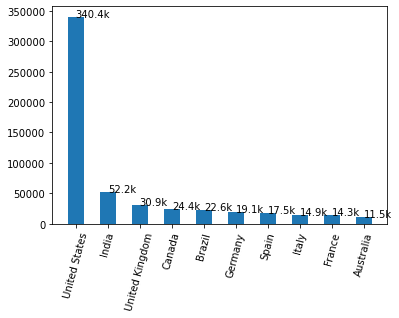

In [25]:
bar = plt.bar(countries , counts, width = 0.5)
plt.xticks(rotation = 75)
for i,count in enumerate(counts):
    plt.text(i,count+2, str(round(count/1000, 1)) + "k")
plt.show()

In [26]:
places_data[0]

{'name': 'Diamond Valley Lake Marina',
 'price': None,
 'address': ['2615 Angler Ave', 'Hemet, CA 92545'],
 'hours': [['Monday', [['6:30 am--4:15 pm']]],
  ['Tuesday', [['6:30 am--4:15 pm']]],
  ['Wednesday', [['6:30 am--4:15 pm']], 1],
  ['Thursday', [['6:30 am--4:15 pm']]],
  ['Friday', [['6:30 am--4:15 pm']]],
  ['Saturday', [['6:30 am--4:15 pm']]],
  ['Sunday', [['6:30 am--4:15 pm']]]],
 'phone': '(951) 926-7201',
 'closed': False,
 'gPlusPlaceId': '104699454385822125632',
 'gps': [33.703804, -117.003209]}

In [27]:
len(places_data)

3114353

Removing entries from the places data where the key "closed" is True and also entires with invalid gps entries. Invalid entry is where the gps co-ordinate is not provided.

In [28]:
valid_places_data = {}
for i in tqdm(range(len(places_data))):
    if places_data[i]['gps'] is not None and places_data[i]['closed'] == False:
        if places_data[i]['name'] not in valid_places_data:
            valid_places_data[places_data[i]['name']] = [places_data[i]['gps'], places_data[i]['gPlusPlaceId']]
#         gps_coords = places_data[i]['gps']
#         valid_places_data.append(gps_coords)

100%|█████████████████████████████| 3114353/3114353 [00:19<00:00, 161803.27it/s]


In [29]:
len(valid_places_data)

2348791

In [30]:
import geopy.distance
from math import sin, cos, sqrt, atan2, radians
import numpy as np

In [31]:
def compute_dist(gps_user, gps_place):

    # approximate radius of earth in km
    R = 6373.0

    lat1 = np.radians(gps_user[0])
    lon1 = np.radians(gps_user[1])
    lat2 = np.radians(gps_place[0])
    lon2 = np.radians(gps_place[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [32]:
valid_user_data = {}
for i in tqdm(range(len(users_data))):
    if users_data[i]['currentPlace'] is not None and users_data[i]['gPlusUserId'] is not None:
        if len(users_data[i]['currentPlace'])>1:
            latitude_user = users_data[i]['currentPlace'][1][1]/10**7
            longitude_user = users_data[i]['currentPlace'][1][2]/10**7
            gps_user = [latitude_user, longitude_user]
            if users_data[i]['gPlusUserId'] not in valid_user_data:
                valid_user_data[users_data[i]['gPlusUserId']] = gps_user

100%|█████████████████████████████| 3747937/3747937 [00:12<00:00, 291854.92it/s]


In [33]:
len(valid_user_data)

737639

In [34]:
# user_business_data = {}
# for user_id in tqdm(valid_user_data):
#     gps_user = valid_user_data[user_id]
#     for place in valid_places_data:
#         gps_place = valid_places_data[place][0]
# #         dist = geopy.distance.geodesic(gps_user, gps_place).km
#         dist = compute_dist(gps_user, gps_place)
#         if dist <= 50:
#             if user_id not in user_business_data:
#                 user_business_data[user_id] = [dist,valid_places_data[place][1]]
#             else:
#                 user_business_data[user_id].append([dist,valid_places_data[place][1]])

In [35]:
user_demographics = []
business_demographics = []
for i in tqdm(range(len(users_data))):
    if users_data[i]['currentPlace'] is not None and users_data[i]['gPlusUserId'] is not None:
        if len(users_data[i]['currentPlace'])>1:
            latitude = users_data[i]['currentPlace'][1][1]/10**7
            longitude = users_data[i]['currentPlace'][1][2]/10**7
            coord = (latitude , longitude)
            pos = rg.search([coord])
            country = pos[0]['country']
            user_demographics.append([users_data[i]['gPlusUserId'], country])

100%|█████████████████████████████| 3747937/3747937 [00:25<00:00, 147811.99it/s]


In [36]:
for i in tqdm(range(len(places_data))):
    if places_data[i]['gps'] is not None and places_data[i]['closed'] == False and places_data[i]['gPlusPlaceId'] is not None:
        latitude = places_data[i]['gps'][0]
        longitude = places_data[i]['gps'][1]
        coord = (latitude , longitude)
        pos = rg.search([coord])
        country = pos[0]['country']
        business_demographics.append([places_data[i]['gPlusPlaceId'], country])

100%|██████████████████████████████| 3114353/3114353 [01:59<00:00, 26052.89it/s]


In [48]:
R = 6371008.7714
a = np.array([[32.86702567346866, -117.250401337591], [35.7,-123.56], [31.59,-117.01]])
X = np.radians(a.reshape(3,2))
print(X.shape)
b = np.array([32.8666369415, -117.2497705260])
tree = BallTree(X, leaf_size=2, metric='haversine')              
dist, ind = tree.query(np.radians(b.reshape(1, -1)), k=2)
print(dist)
x = (dist*R) 
print(x)
print(a[ind])

(3, 2)
[[1.14693923e-05 2.25609561e-02]]
[[7.30715986e+01 1.43736050e+05]]
[[[  32.86702567 -117.25040134]
  [  31.59       -117.01      ]]]


In [62]:
def compute_geodesic_distance(user_gps, places_gps, neighbours):
    R = 6371008.7714
    a = np.array(places_gps)
    X = np.radians(a.reshape(len(a),2))
    b = np.array(user_gps)
    tree = BallTree(X, leaf_size=2, metric='haversine')              
    dist, ind = tree.query(np.radians(b.reshape(1, -1)), k= neighbours)                
    x = (dist*R) 
    return x, ind

In [63]:
len(valid_user_data)

737639

In [64]:
# valid_user_data

In [65]:
len(valid_places_data)

2348791

In [66]:
# valid_places_data

In [57]:
places_gps = []
placesID = []
for place in tqdm(valid_places_data):
    places_gps.append(valid_places_data[place][0])
    placesID.append(valid_places_data[place][1])

100%|█████████████████████████████| 2348791/2348791 [00:08<00:00, 261185.84it/s]


In [67]:
places_gps[:5]

[[33.703804, -117.003209],
 [38.979759, -76.547538],
 [43.22776, 44.762726],
 [43.529494, -96.792244],
 [-2.976256, 104.742662]]

In [68]:
placesID[:5]

['104699454385822125632',
 '103054478949000078829',
 '109810290098030327104',
 '100327153115986850675',
 '103368487323937936043']

In [ ]:
user_business_dist = {}
for userID in tqdm(valid_user_data):
    gps_user = valid_user_data[userID]
    gps_places = places_gps
    top10_dist, top10_ind = compute_geodesic_distance(gps_user, gps_places, 10)
    top10_placeID = np.array(placesID)[top10_ind[0]]
    user_business_dist[userID] = top10_placeID

In [79]:
x = [i for i in range(10)]
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [86]:
y = np.array([str(i) for i in range(100)])

In [87]:
y[x]

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U2')